In [1]:
import seaborn as sea
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
data = pd.read_csv('Loan_Default.csv')

## Exploration

In [3]:
data

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
data.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

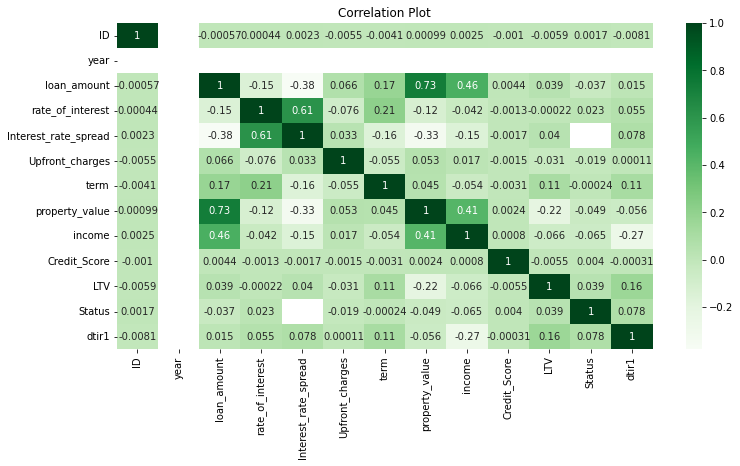

In [8]:
sea.heatmap(data.corr(),annot=True, cmap='Greens')
plot.title('Correlation Plot')
plot.rcParams['figure.figsize']=(12,6)

<AxesSubplot:xlabel='income', ylabel='loan_amount'>

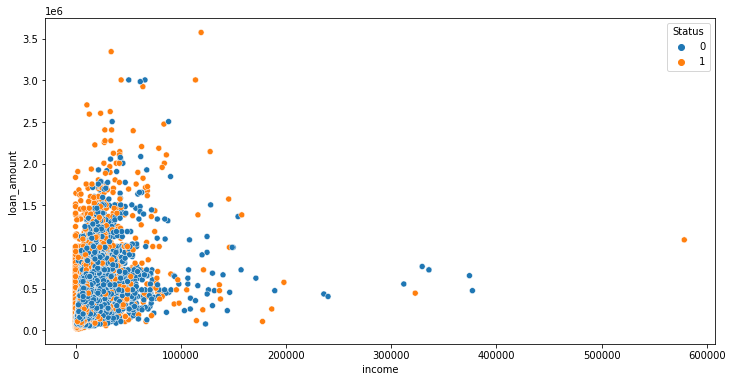

In [52]:
sea.scatterplot(x=data['income'],y=data['loan_amount'],hue=data['Status'])

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

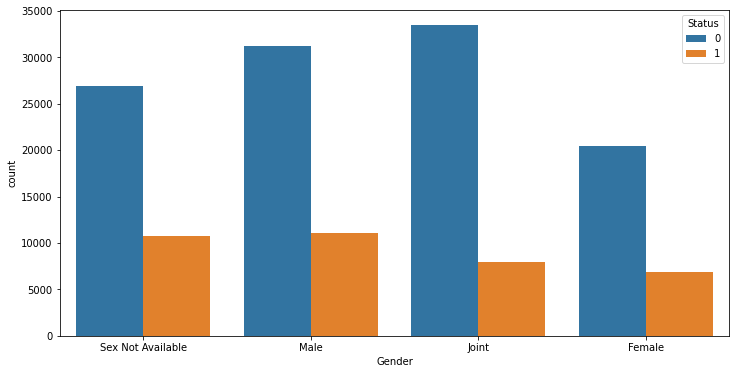

In [46]:
sea.countplot(data['Gender'],hue=data['Status'])

## Numerical Columns Analysis

In [9]:
numerics = data.select_dtypes(include=np.number)

In [16]:
numerics.isna().sum()

ID                          0
year                        0
loan_amount                 0
rate_of_interest        36439
Interest_rate_spread    36639
Upfront_charges         39642
term                       41
property_value          15098
income                   9150
Credit_Score                0
LTV                     15098
Status                      0
dtir1                   24121
dtype: int64

In [10]:
numerics.columns

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1'],
      dtype='object')

In [11]:
numerics.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


<AxesSubplot:xlabel='loan_amount', ylabel='Count'>

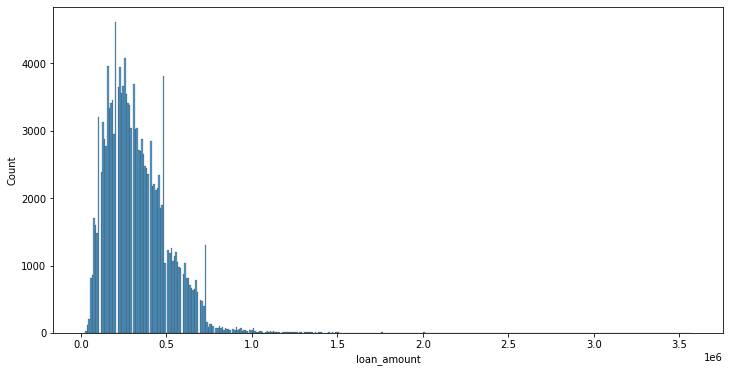

In [45]:
sea.histplot(data['loan_amount'])

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amount'>

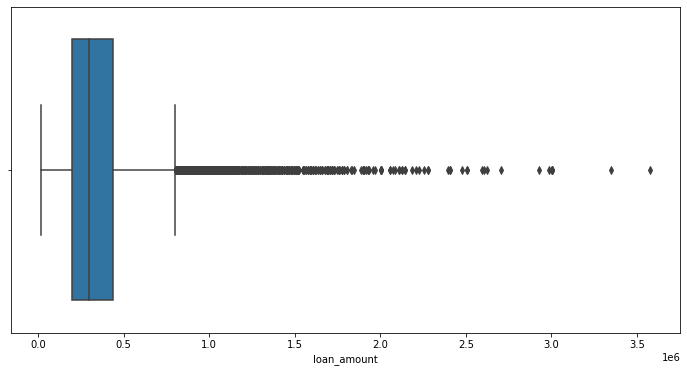

In [44]:
sea.boxplot(data['loan_amount'])

<AxesSubplot:xlabel='rate_of_interest', ylabel='Count'>

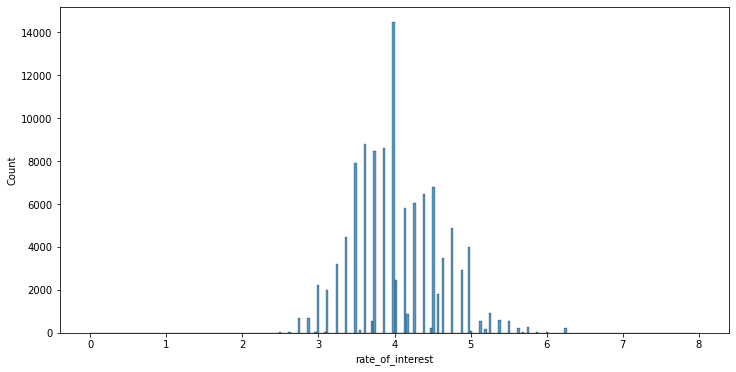

In [12]:
sea.histplot(data['rate_of_interest'])

<AxesSubplot:xlabel='Interest_rate_spread', ylabel='Count'>

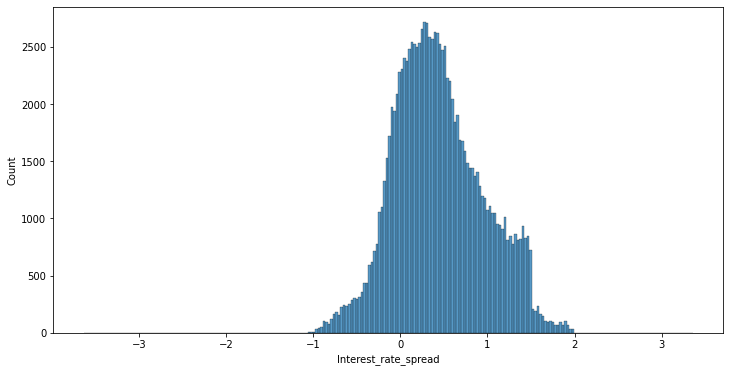

In [13]:
sea.histplot(data['Interest_rate_spread'])

<AxesSubplot:xlabel='Upfront_charges', ylabel='Count'>

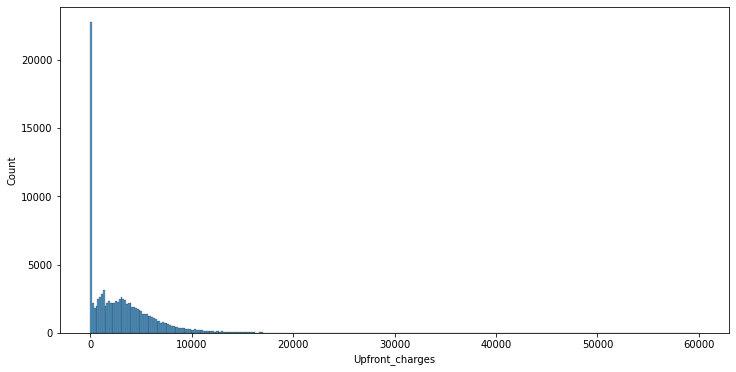

In [14]:
# I don't uderstand this column
sea.histplot(data['Upfront_charges'])

In [15]:
data['term'].unique()

array([360., 300., 180., 312., 144., 240., 348., 324., 120.,  96., 192.,
       156., 228., 336., 288., 108., 276.,  nan, 132., 216., 168., 204.,
       264., 252., 165., 280., 322.])

<AxesSubplot:xlabel='property_value', ylabel='Count'>

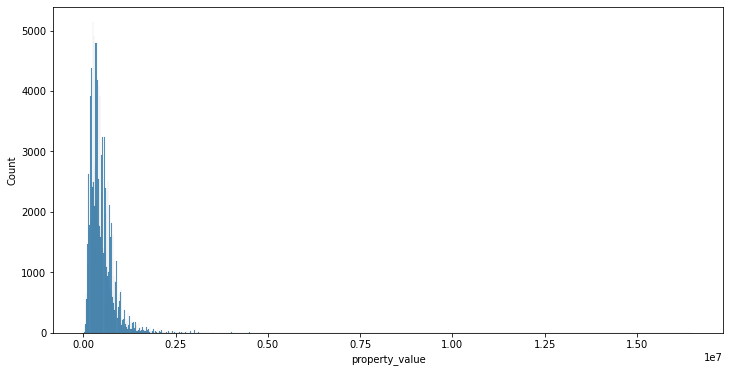

In [35]:
sea.histplot(data['property_value'])

<AxesSubplot:xlabel='property_value', ylabel='Count'>

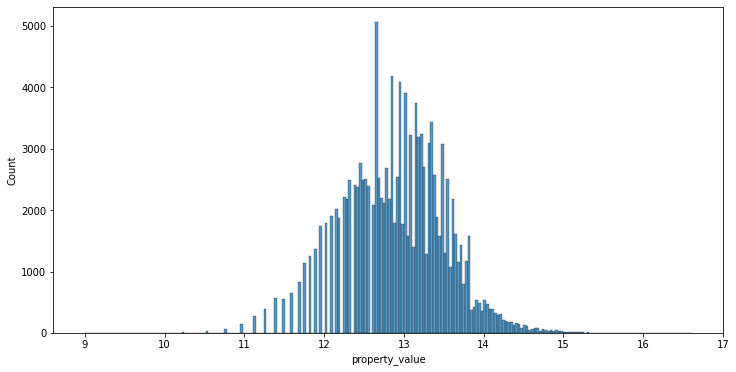

In [34]:
sea.histplot(np.log(data['property_value']))

<AxesSubplot:xlabel='income', ylabel='Count'>

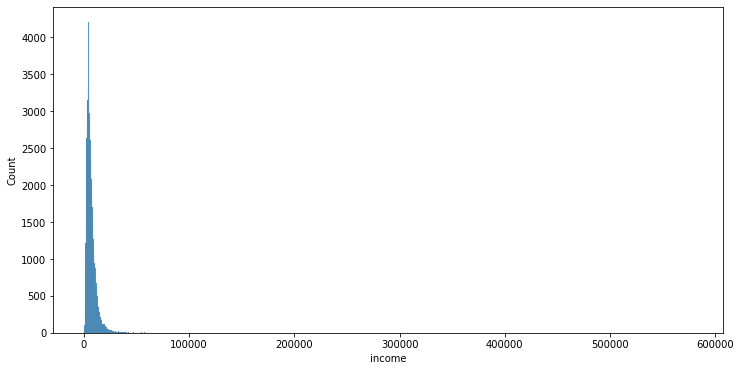

In [38]:
sea.histplot(data['income'])

<AxesSubplot:xlabel='LTV', ylabel='Count'>

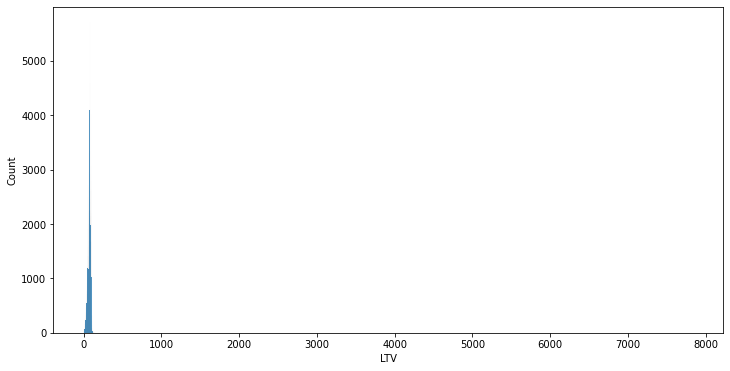

In [39]:
sea.histplot(data['LTV'])

In [27]:
#Percentages of null values
numerics.isna().sum().apply(lambda x: (x/len(data))*100)

ID                       0.000000
year                     0.000000
loan_amount              0.000000
rate_of_interest        24.509989
Interest_rate_spread    24.644515
Upfront_charges         26.664425
term                     0.027578
property_value          10.155378
income                   6.154571
Credit_Score             0.000000
LTV                     10.155378
Status                   0.000000
dtir1                   16.224524
dtype: float64

## Categotical Columns Analysis

In [32]:
cat = data.select_dtypes(exclude=np.number)

In [33]:
cat

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,EXP,55-64,to_inst,south,direct
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,ir,home,4U,CIB,CIB,25-34,not_inst,south,direct
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,EXP,45-54,not_inst,North,direct
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,EXP,55-64,to_inst,North,direct


In [ ]:
data.columns

In [ ]:
data.shape

In [ ]:
data['age'].unique()

In [ ]:
sea.histplot(data['age'])

## Data Cleaning

In [ ]:
sea.histplot(data['loan_limit'])

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
data['loan_limit'] = imputer.fit_transform(data[['loan_limit']]).flatten()

In [ ]:
sea.histplot(data['approv_in_adv'])

In [ ]:
data

In [ ]:
data['approv_in_adv'] = imputer.fit_transform(data[['approv_in_adv']]).flatten()

In [ ]:
sea.histplot(data['loan_purpose'])

In [ ]:
data['loan_purpose'] = imputer.fit_transform(data[['loan_purpose']]).flatten()

In [ ]:
data['rate_of_interest'].unique()

In [ ]:
#Checking percentage of Null values
(len(data['rate_of_interest'][data['rate_of_interest'].isna()==True])/len(data['rate_of_interest'])) * 100

In [ ]:
mean_imputer = SimpleImputer(strategy='mean')
data['rate_of_interest']=mean_imputer.fit_transform(data[['rate_of_interest']]).flatten()

In [ ]:
#Checking percentage of Null values
(len(data['Interest_rate_spread'][data['Interest_rate_spread'].isna()==True])/len(data['Interest_rate_spread'])) * 100

In [ ]:
data['Interest_rate_spread']=mean_imputer.fit_transform(data[['Interest_rate_spread']]).flatten()

In [ ]:
data.isna().sum()

In [ ]:
data

### Feature Enginnering

In [ ]:
from sklearn.preprocessing import LabelEncoder

## Imbalance fix

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier

# Modelling